In [7]:
from aws.claude import BedrockClaude
from utils.images import encode_image_base64_from_file, display_image


claude = BedrockClaude(
    region="us-west-2",
    modelId="anthropic.claude-3-5-sonnet-20240620-v1:0"
)

## Invoke Multimodal LLM with Bedrock API


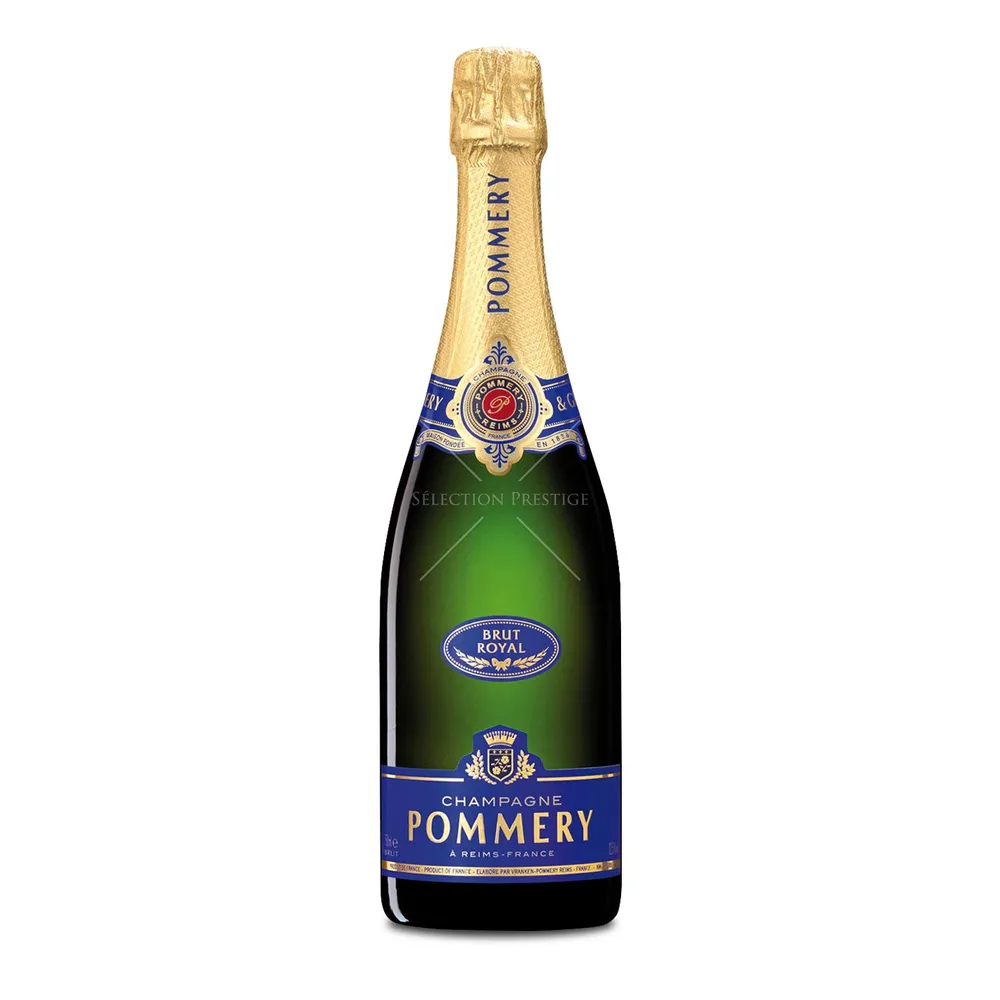

이 이미지는 고급 샴페인 브랜드인 Pommery의 병을 보여주고 있습니다.

병의 특징:
1. 전체적으로 우아하고 고급스러운 디자인을 가지고 있습니다.
2. 병 상단은 금색 호일로 감싸져 있습니다.
3. 병목 부분에는 파란색 띠와 함께 'POMMERY' 로고가 새겨져 있습니다.
4. 중앙에는 파란색과 금색의 장식적인 라벨이 있습니다.
5. 병 본체는 짙은 녹색 유리로 만들어져 있습니다.

라벨 정보:
1. 'BRUT ROYAL'이라는 문구가 중앙에 있습니다.
2. 'CHAMPAGNE POMMERY'라는 브랜드명이 크게 표시되어 있습니다.
3. 'A REIMS-FRANCE'라는 원산지 표시가 있습니다.
4. 'Selection Prestige'라는 문구가 병 하단에 보입니다.

전반적으로 이 샴페인 병은 고급스러움과 전통을 강조하는 디자인을 가지고 있으며, 프랑스 샴페인 지역의 명품 브랜드임을 나타내고 있습니다.


In [21]:
encoded_base64 = encode_image_base64_from_file(file_path="./sample/pommery.jpg")
display_image(encoded_base64)

res = claude.invoke_llm_response(text="Describe this image as detail as possible. Always answer in Korean.", image=encoded_base64)
print(res)

## Invoke Multimodal LLM with LangChain

In [24]:
from langchain.callbacks import StreamingStdOutCallbackHandler
from langchain.prompts import PromptTemplate
from langchain.schema import (
    HumanMessage,
    SystemMessage,
)

def get_prompt(text: str = 'Describe this image', image: str = None):
    content = []

    if image:
        content.append({
            "type": "image_url",
            "image_url": {
                "url": f"data:image/webp;base64,{image}",
            },
        })

    text = PromptTemplate(
            template="""Answer the user's questions, breaking them down into separate points.
            Add any creative ideas that come to mind based on the user's question. Always answer in Korean.

            Here is a question from Human:
            <question>
            {question}
            </question>
            """,
            input_variables=["question"]
        ).format(question=text)

    content.append({
        "type": "text",
        "text": text
    })

    messages = [
        SystemMessage(content="You are a creative assistant."),
        HumanMessage(
            content=content
        )
    ]

    return messages


In [25]:
callback = StreamingStdOutCallbackHandler()
chat = claude.get_chat_model(callback=callback)

prompt = get_prompt(text="Describe this image as detail as possible.", image=encoded_base64)
res = await chat.ainvoke(prompt)

이 이미지는 고급스러운 샴페인 병을 보여주고 있습니다. 자세히 설명하겠습니다:

1. 브랜드: 이 샴페인은 Pommery 브랜드입니다.

2. 종류: "Brut Royal"이라는 라벨이 있어 드라이한 스타일의 샴페인임을 알 수 있습니다.

3. 병 디자인: 
   - 전형적인 샴페인 병 모양을 가지고 있습니다.
   - 병 상단은 금박으로 감싸져 있어 고급스러움을 더합니다.
   - 병의 주요 부분은 짙은 녹색 유리로 되어 있습니다.

4. 라벨:
   - 주요 라벨은 파란색과 금색으로 디자인되어 있습니다.
   - "Selection Prestige"라는 문구가 보입니다.
   - 프랑스 랭스 지역에서 생산되었다는 정보가 있습니다.

5. 로고: 병 목 부분에 원형의 로고가 있으며, 중앙에 'P' 문자가 보입니다.

6. 전체적인 인상: 고급스럽고 전통적인 느낌을 주는 디자인입니다.

창의적 아이디어:
- 이 샴페인으로 특별한 칵테일을 만들어보는 것은 어떨까요? 예를 들어, "Pommery Royal Fizz"라는 이름으로 신선한 과일과 허브를 곁들인 칵테일을 만들 수 있습니다.
- 이 병의 우아한 디자인을 활용하여, 다 마신 후에는 화병이나 장식용 조명으로 재활용할 수 있을 것 같습니다.